In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator
sns.set_theme()
# sequence - features
# family_accession labels

In [2]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [ ]:
n_files = 5 # no of files to use

df = pd.concat(
    (pd.read_csv(f"data/train/data-000{i:02d}-of-00080") for i in range(n_files))
)
df

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,GMC_oxred_C,A4WZS5_RHOS5/416-539,PF05199.13,PHPE.SRIRLST.RRDAHGMP.....IP.RIESRLGP............,PHPESRIRLSTRRDAHGMPIPRIESRLGPDAFARLRFMARTCRAIL...
1,DUF2887,K9QI92_9NOSO/3-203,PF11103.8,RDSIYYQIFKRFPALIFEL..VD.NRPPQAQNYRFESVEVKETAFR...,RDSIYYQIFKRFPALIFELVDNRPPQAQNYRFESVEVKETAFRIDG...
2,zf-IS66,Q92LC9_RHIME/32-75,PF13005.7,.TCCPDCGG.E..LRLVGED.AS....EILDMI.AAQMKVIEVARL...,TCCPDCGGELRLVGEDASEILDMIAAQMKVIEVARLKKSCRCCE
3,Asp_decarbox,X2GQZ4_9BACI/1-115,PF02261.16,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...
4,Filamin,A7SQM3_NEMVE/342-439,PF00630.19,TACPKQ.CTA....RGLG.............LK.AAPVT.QPT..R...,TACPKQCTARGLGLKAAPVTQPTRFVVILNDCHGQPLGRSEGELEV...
...,...,...,...,...,...
13370,Tub_N,F1RNI1_PIG/29-238,PF16322.5,RQRALLEQKQKKKRQEPL.MVQANADGR..PRSRRARQSE.........,RQRALLEQKQKKKRQEPLMVQANADGRPRSRRARQSEEQAPLVESY...
13371,Phospho_p8,A0A1X7VUV4_AMPQE/3-63,PF10195.9,HIYFDEYDY.FNFGSGFDKMFPDNKNTGHSKHKGYKLETQRYSPSG...,HIYFDEYDYFNFGSGFDKMFPDNKNTGHSKHKGYKLETQRYSPSGH...
13372,E3_binding,D5QEH1_KOMHA/126-161,PF02817.17,VFASPVAR.RLARLHEL....DLR..RV..G....G....S.GPRG...,VFASPVARRLARLHELDLRRVGGSGPRGRILRRDIE
13373,CDT1,W5MBI2_LEPOC/258-422,PF08839.11,LPYKYKMLAEMFRCLDTIVSILFNRSETATFAK.VKQGVQDMMH.....,LPYKYKMLAEMFRCLDTIVSILFNRSETATFAKVKQGVQDMMHKRF...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67892 entries, 0 to 13374
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   family_id         67892 non-null  object
 1   sequence_name     67892 non-null  object
 2   family_accession  67892 non-null  object
 3   aligned_sequence  67892 non-null  object
 4   sequence          67892 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [5]:
# all domains unique, will have ot break down into each position/segments likely
df.sequence.value_counts().sort_values(ascending=False)

sequence
GLYHLTSDSSPAVCISTDAPLLIHNRLGHPSLSKFQKMVPRFSTLSSLPCESCQLGKH                                                                                                                                                                                                                                                      3
RMFVVFAAVKKSKETEETRCLQVIGKANNMWHKRFGHLNHQGLRSLAEKEMVKGLPKFDLGEEEAVCDICLKGKQ                                                                                                                                                                                                                                     2
TLYMTSCPRDTIAVADASTDTSLWHRRLGHMSEKGMKMLLSKGKLPELKSIDFDMCESCILGKQ                                                                                                                                                                                                                                                2
AATLNNLAVLYGKRGKYKEAEPLCKRALEIREKV                                       

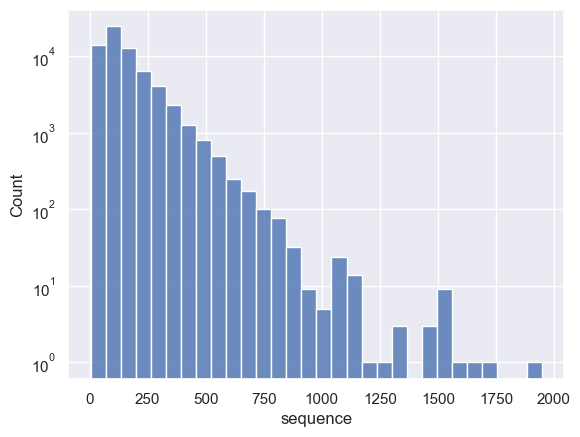

In [6]:
# sequences of different lengths, longest is almost 2000 tokens, could be problematic context window
sns.histplot(x=df.sequence.str.len(), bins=30, alpha=0.8, edgecolor='white', log=True);

In [7]:
df.family_id.value_counts().head(10)

family_id
Methyltransf_25    218
LRR_1              125
Acetyltransf_7     119
His_kinase         105
Lum_binding        105
Bac_transf         102
DnaJ_CXXCXGXG       86
Glycos_trans_3N     85
Chromate_transp     83
Lipase_GDSL_2       79
Name: count, dtype: int64

In [8]:
df.family_id.str.len().value_counts()

family_id
7     11270
4     10603
6      7538
5      5439
15     4916
13     4299
14     4074
9      3441
3      3411
12     3353
11     3092
8      2999
10     2932
2       521
1         4
Name: count, dtype: int64

[Text(0.5, 0, 'family_id len')]

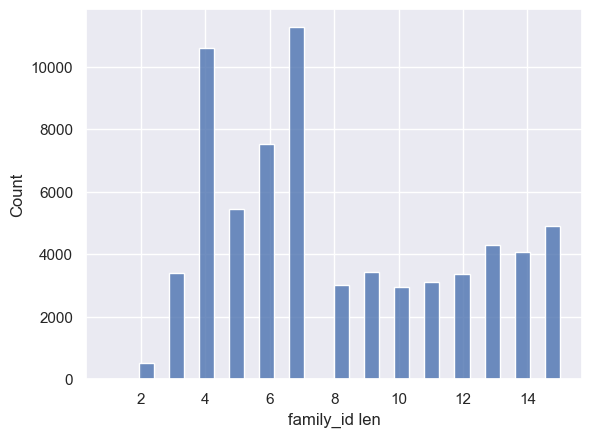

In [9]:
ax = sns.histplot(x=df.family_id.str.len(), bins=30, alpha=0.8, edgecolor='white');
ax.set(
    xlabel="family_id len"
)

In [10]:
PAD_TOKEN = '-'
max_len = df["sequence"].str.len().max()
df_expanded = df["sequence"].apply(lambda x: list(x.ljust(max_len, PAD_TOKEN)))

df_split = pd.DataFrame(df_expanded.tolist(), index=df.index)

df_split

,0,1,2,3,4,5,6,7,8,9,...,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947
0,P,H,P,E,S,R,I,R,L,S,...,-,-,-,-,-,-,-,-,-,-
1,R,D,S,I,Y,Y,Q,I,F,K,...,-,-,-,-,-,-,-,-,-,-
2,T,C,C,P,D,C,G,G,E,L,...,-,-,-,-,-,-,-,-,-,-
3,M,L,R,M,M,M,N,S,K,I,...,-,-,-,-,-,-,-,-,-,-
4,T,A,C,P,K,Q,C,T,A,R,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13370,R,Q,R,A,L,L,E,Q,K,Q,...,-,-,-,-,-,-,-,-,-,-
13371,H,I,Y,F,D,E,Y,D,Y,F,...,-,-,-,-,-,-,-,-,-,-
13372,V,F,A,S,P,V,A,R,R,L,...,-,-,-,-,-,-,-,-,-,-
13373,L,P,Y,K,Y,K,M,L,A,E,...,-,-,-,-,-,-,-,-,-,-


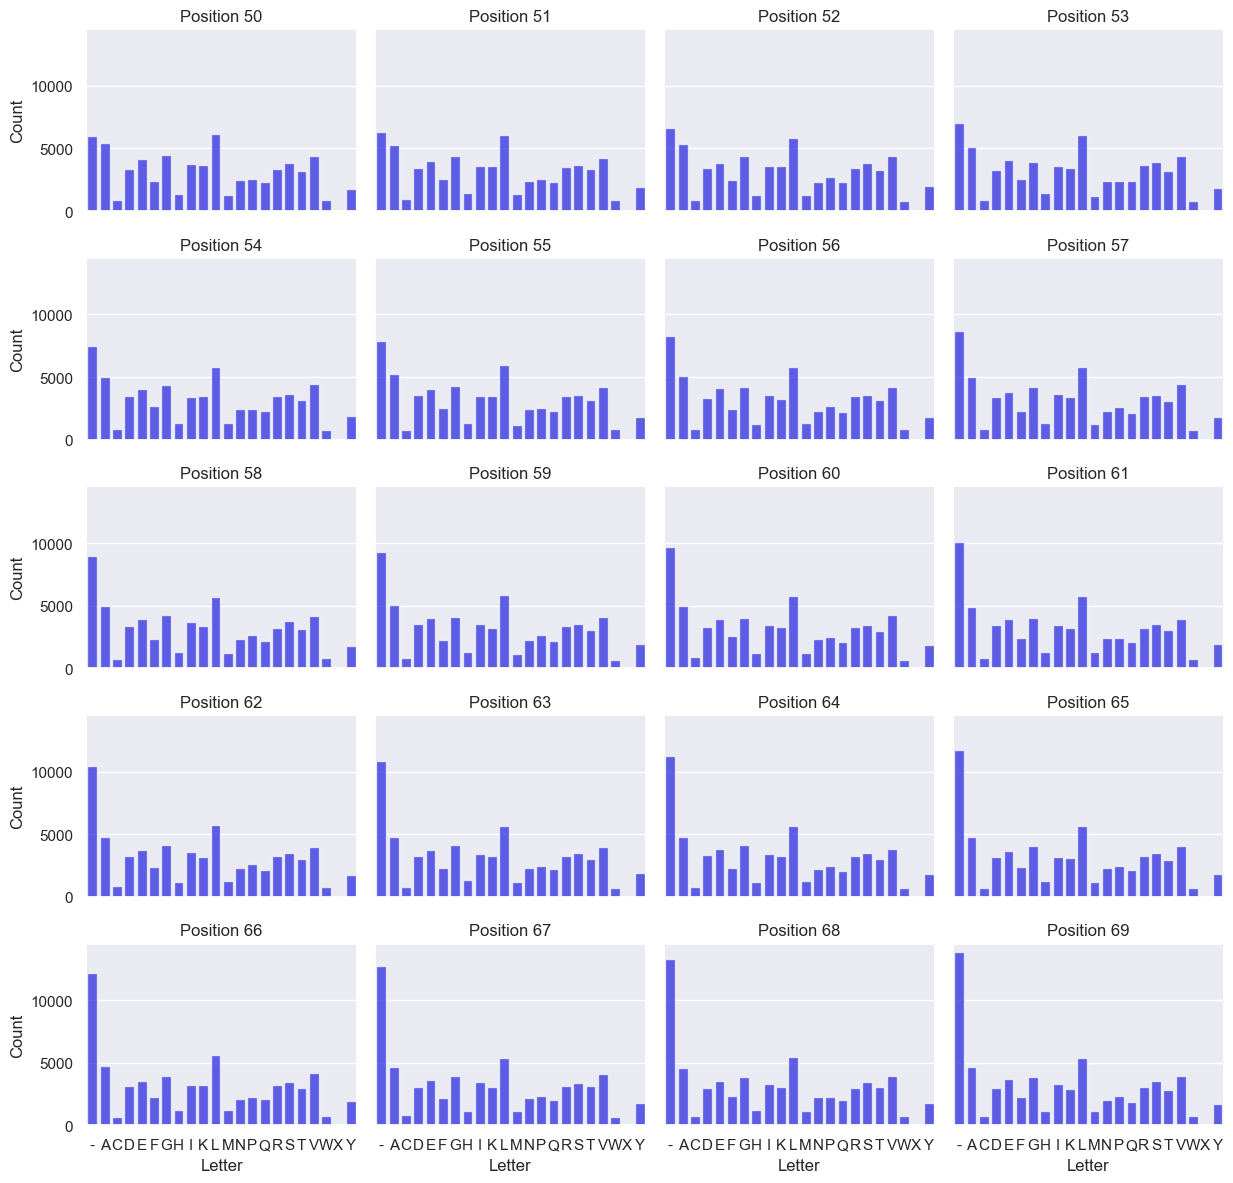

In [11]:

# plot first 20 positions, all look pretty similar
n_pos = 20
start = 50
positions_to_plot = range(start, start + n_pos)

n_cols = 4
n_rows = n_pos // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(2.5*n_rows, 3*n_cols), sharey=True, sharex=True)

for i, col in enumerate(positions_to_plot):
    r, c = divmod(i, n_cols)
    ax = axes[r, c]
    counts = df_split[col].value_counts().sort_index()
    sns.barplot(x=counts.index, y=counts.values, ax=ax, color='blue', alpha=0.7, edgecolor='white')
    ax.set_title(f"Position {col}")
    ax.set_xlabel("Letter")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

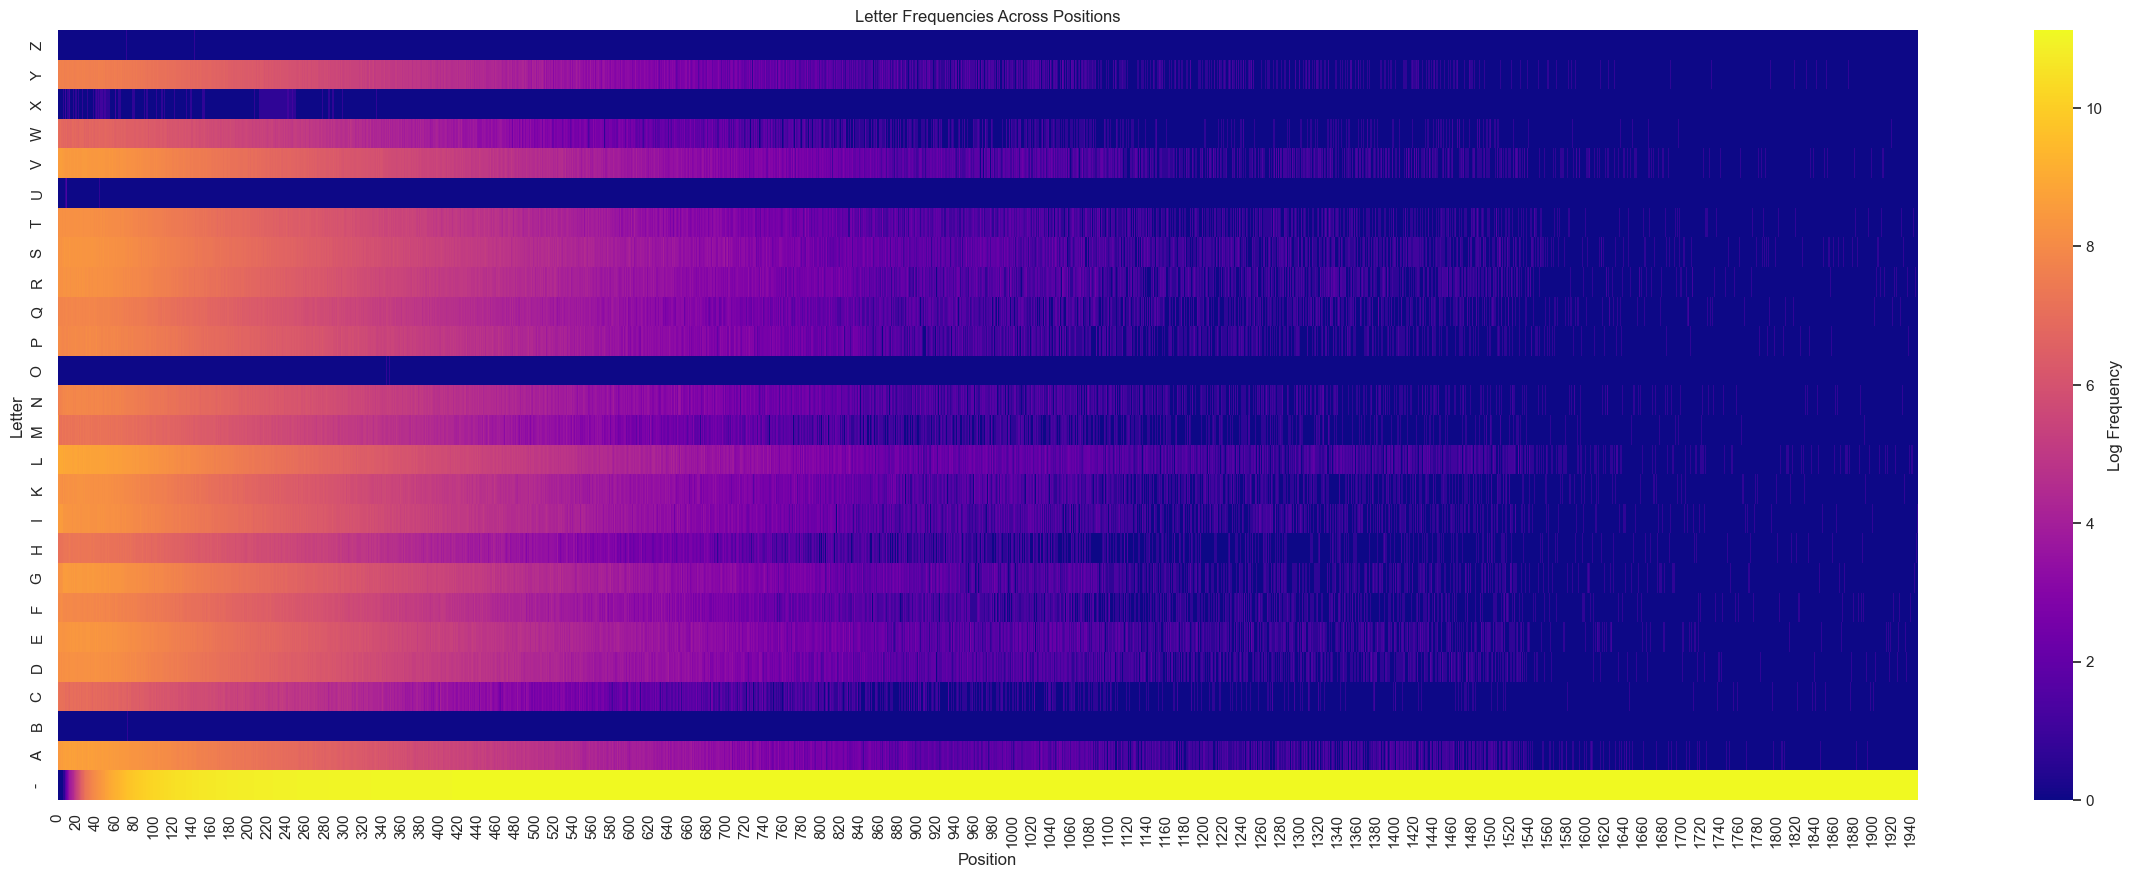

In [12]:
freq = df_split.apply(lambda x: np.log(1+x.value_counts())).fillna(0)

freq = freq.sort_index(ascending=False)

plt.figure(figsize=(30, 10))
sns.heatmap(freq, cmap="plasma", cbar_kws={'label': 'Log Frequency'})
plt.xlabel("Position")
plt.ylabel("Letter")
plt.title("Letter Frequencies Across Positions")
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))

# Control tick size as a lot of columns
step = 20
tick_positions = range(0, len(freq.columns), step)
tick_labels = freq.columns[::step]
plt.xticks(tick_positions, tick_labels, rotation=90)
plt.show()

Observations:
1. X, U, B, O, Z are particularly rare across all positions as stated by the dataset
2. The pad token frequency after around 200 increases to near max - most proteins are shorter than this
3. A,D,L,R,V are quite common 
4. striation/banded pattern behaviour - after the frequency of observing an acid goes down significantly, there are a lot of gaps in the heat map - not necessarily periodic, but not completely random either.

### Labels exploration
Basic things to get idea of:
- number of categories
- frequency distribution of categories (i.e. class imbalance)
- how many families/versions within each?

Counts distribution is highly skewed toward zero, most labels occur under 100 times, max is ~427 from the first 10 datasets.
Definitely going to need to deal with class imbalance appropriately (eg. weighted losses, balanced accuracy/precision/recall metrics, stratified sampling)

-  will also require a way to deal with unknown classes not seen at test time from training set

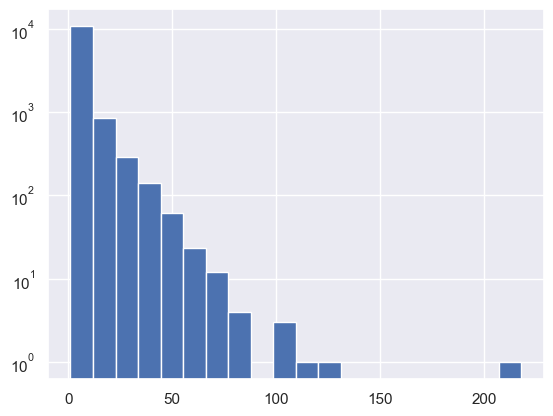

In [13]:
df.family_accession.value_counts().hist(log=True, bins=20);

In [14]:
df.family_accession.value_counts().head(10)

family_accession
PF13649.6     218
PF00560.33    125
PF13508.7     119
PF06580.13    105
PF00677.17    105
PF02397.16    102
PF00684.19     86
PF02885.17     85
PF02417.15     83
PF13472.6      79
Name: count, dtype: int64

In [15]:
df.family_accession.value_counts().head(10)

family_accession
PF13649.6     218
PF00560.33    125
PF13508.7     119
PF06580.13    105
PF00677.17    105
PF02397.16    102
PF00684.19     86
PF02885.17     85
PF02417.15     83
PF13472.6      79
Name: count, dtype: int64

In [16]:
df[["Family", "Version"]] = df.family_accession.str.split('.', expand=True)
df["Family"].value_counts().head(10)

Family
PF13649    218
PF00560    125
PF13508    119
PF06580    105
PF00677    105
PF02397    102
PF00684     86
PF02885     85
PF02417     83
PF13472     79
Name: count, dtype: int64

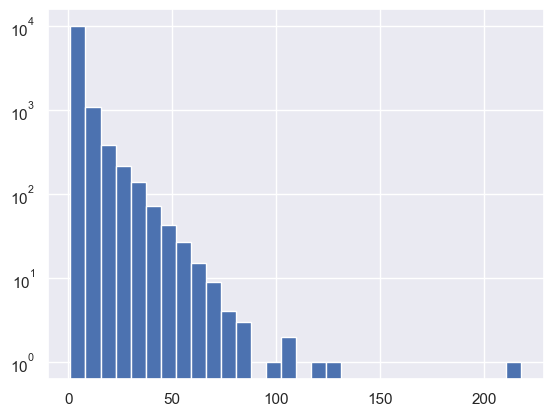

In [17]:
df["Family"].value_counts().hist(log=True, bins=30);

<Axes: >

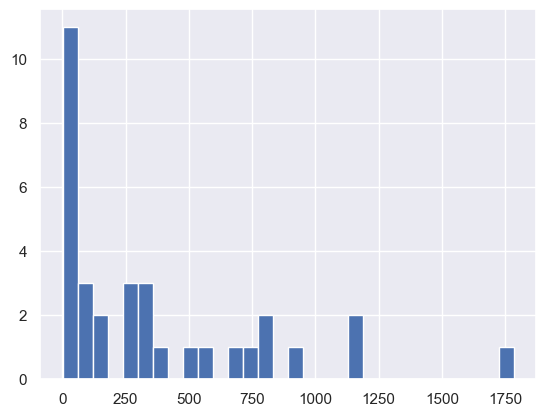

In [18]:
# each protein could have hundreds-thousands of versions
df[["Family", "Version"]].groupby("Family")["Version"].max().value_counts().hist(bins=30)

### Questions:
1. What is the biological meaning of protein families/version numbers, how might a model learn similar protein families?
2. Are some predictions worse than others, should we penalise accordingly? eg. right family right version? Multilabel? Might a two-step process where we first predict the family, then given a family predict the version
be easier than an end to end solution?
3. Do the other data columns hold any useful information? Obviously, start with just the sequence itself.

In [19]:
from sklearn.model_selection import train_test_split

# stratify errors when population too small for last class (only one example)
# smaller subset for testing pipeline
subset = 1000
X_train, X_valid, y_train, y_valid = train_test_split(df_split[:subset], df.family_accession[:subset], train_size=0.8, random_state=RANDOM_SEED, 
                                                      stratify=None)

In [20]:
def train_eval_seq_model_fast(
    X_train, X_valid, y_train, y_valid,
    model_config=None,
    alphabet="ACDEFGHIKLMNPQRSTVWY",   # 20 canonical AAs
    include_ambigs=True,
    pad_token="-",
    on_unseen_valid_labels="drop",      # "drop" | "error" | "keep-as-new-class"
    strict_features=True,
):
    import numpy as np
    from sklearn.preprocessing import LabelEncoder
    from sklearn.metrics import balanced_accuracy_score, classification_report
    from sklearn.naive_bayes import CategoricalNB
    from sklearn.linear_model import LogisticRegression

    # -------- helpers (zero-copy ASCII encoder) --------
    def build_lut(alphabet, include_ambigs, pad_token):
        ambigs = "BXZJUO" if include_ambigs else ""
        tokens = list(dict.fromkeys(list(alphabet) + list(ambigs) + [pad_token]))  # stable uniques
        tokens.append("<UNK>")
        token2id = {t: i for i, t in enumerate(tokens)}
        # 256-entry LUT for ASCII → id; default to UNK
        lut = np.full(256, token2id["<UNK>"], dtype=np.int16)
        for t, i in token2id.items():
            if len(t) == 1:
                code = ord(t)
                if 0 <= code < 256:
                    lut[code] = i
        return lut, token2id, tokens

    def as_S1(a):
        # coerce to single-byte strings (ASCII); creates at most one copy
        arr = np.asarray(a, dtype="S1")  # each cell = 1 byte
        if strict_features:
            # any element not length-1 (shouldn't happen with S1) or non-ASCII text upstream
            if arr.dtype.itemsize != 1:
                raise ValueError("Expected single-byte tokens per position.")
        return arr

    def encode_ascii(arr_S1, lut):
        # view S1 array as uint8 and map via LUT in one vectorized step
        u8 = arr_S1.view(np.uint8).reshape(arr_S1.shape)
        return lut[u8].astype(np.int16, copy=False)  # small integer dtype

    # -------- build vocab/LUT and encode features (O(N)) --------
    lut, token2id, vocab = build_lut(alphabet, include_ambigs, pad_token)

    Xtr_S1 = as_S1(X_train)
    Xva_S1 = as_S1(X_valid)

    # quick sanity: any multi-char tokens (e.g., "PF18015.1")?
    if strict_features:
        # With S1, length>1 cannot appear; but detect obviously bad bytes like b'' (empty)
        if (Xtr_S1 == b"").any() or (Xva_S1 == b"").any():
            raise ValueError("Empty tokens found in X; ensure each position is a single AA or '-'.")

    # integer-coded categoricals (no copies besides the encoded array)
    Xtr_enc = encode_ascii(Xtr_S1, lut)
    Xva_enc = encode_ascii(Xva_S1, lut)

    # -------- labels + unseen handling --------
    le = LabelEncoder()
    y_tr = le.fit_transform(y_train)
    y_valid_arr = np.asarray(y_valid)

    unseen = np.setdiff1d(y_valid_arr, le.classes_)
    if unseen.size:
        if on_unseen_valid_labels == "error":
            raise ValueError(f"Unseen label(s) in y_valid (e.g. {unseen[:3]}).")
        elif on_unseen_valid_labels == "drop":
            mask = ~np.isin(y_valid_arr, unseen)
            Xva_enc, y_valid_arr = Xva_enc[mask], y_valid_arr[mask]
            if y_valid_arr.size == 0:
                raise ValueError("All validation rows were dropped due to unseen labels.")
            y_va = le.transform(y_valid_arr)
        elif on_unseen_valid_labels == "keep-as-new-class":
            le.classes_ = np.concatenate([le.classes_, unseen])
            y_va = le.transform(y_valid_arr)
        else:
            raise ValueError("on_unseen_valid_labels must be 'drop', 'error', or 'keep-as-new-class'.")
    else:
        y_va = le.transform(y_valid_arr)

    # class weights (inverse freq)
    classes, counts = np.unique(y_tr, return_counts=True)
    class_weights = {int(c): float(len(y_tr) / (len(classes) * cnt)) for c, cnt in zip(classes, counts)}

    # -------- choose + train model (RAM-conscious) --------
    model_config = (model_config or {"model": "catboost"})
    m = model_config.get("model", "catboost").lower()

    if m == "categorical_nb":
        # tiny RAM footprint
        clf = CategoricalNB(alpha=model_config.get("alpha", 1.0))
        clf.fit(Xtr_enc, y_tr)
        X_eval = Xva_enc

    elif m == "logreg":
        clf = LogisticRegression(
            max_iter=model_config.get("max_iter", 1000),
            C=model_config.get("C", 1.0),
            class_weight=class_weights,
            n_jobs=1,  # lower peak RAM on small Macs
            random_state=model_config.get("random_state", 0),
        )
        clf.fit(Xtr_enc, y_tr)
        X_eval = Xva_enc

    elif m == "catboost":
        from catboost import CatBoostClassifier, Pool
        n_features = Xtr_enc.shape[1]
        cat_idx = list(range(n_features))  # mark *all* columns as categorical

        # RAM-savvy defaults for your machine; tune up later
        clf_params = dict(
            depth=model_config.get("depth", 6),              # keep modest
            iterations=model_config.get("iterations", 300),  # start smaller
            learning_rate=model_config.get("learning_rate", 0.1),
            l2_leaf_reg=model_config.get("l2_leaf_reg", 6.0),
            loss_function="MultiClass" if len(classes) > 2 else "Logloss",
            class_weights=[class_weights[i] for i in range(len(classes))],
            random_seed=model_config.get("random_seed", 0),
            verbose=model_config.get("verbose", 100),        # prints progress
            allow_writing_files=False,
            rsm=model_config.get("rsm", 0.5),                # feature subsampling
            subsample=model_config.get("subsample", 0.8),    # row subsampling
            thread_count=model_config.get("thread_count", 4),# fewer threads → lower RAM
            used_ram_limit=model_config.get("used_ram_limit", "8gb"),  # keep under UM cap
        )
        train_pool = Pool(Xtr_enc, label=y_tr, cat_features=cat_idx)
        clf = CatBoostClassifier(**clf_params)
        clf.fit(train_pool)
        X_eval = Pool(Xva_enc, cat_features=cat_idx)

    else:
        raise ValueError("model_config['model'] must be 'catboost', 'categorical_nb', or 'logreg'.")

    # -------- evaluate --------
    y_pred = clf.predict(X_eval)
    if isinstance(y_pred, np.ndarray) and y_pred.ndim > 1:
        y_pred = y_pred.ravel()

    bal_acc = balanced_accuracy_score(y_va, y_pred)
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(classification_report(y_va, y_pred, target_names=le.classes_, zero_division=0))

    return {
        "model": clf,
        "label_encoder": le,
        "balanced_accuracy": bal_acc,
        "vocab": vocab,
        "token2id": token2id,
        "pad_token": pad_token,
    }

In [21]:
model_config = {
    "model": "categorical_nb",
    "alpha": 1.0,      # Laplace smoothing
}

art_nb = train_eval_seq_model_fast(
    X_train, X_valid, y_train, y_valid,
    model_config=model_config,
    on_unseen_valid_labels="drop"
)

/Users/andrewwu/personal-projects/instadeep-bioai/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  self.y_type_ = type_of_target(y, input_name="y")
/Users/andrewwu/personal-projects/instadeep-bioai/.venv/lib/python3.12/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
/Users/andrewwu/personal-projects/instadeep-bioai/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:359: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_is_multilabel = type_of_target(y).startswith("multilabel

Balanced Accuracy: 0.0000


/Users/andrewwu/personal-projects/instadeep-bioai/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/andrewwu/personal-projects/instadeep-bioai/.venv/lib/python3.12/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
/Users/andrewwu/personal-projects/instadeep-bioai/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/andrewwu/personal-projects/instadeep-bioai/.venv/lib/python3.12/site-packages/sklearn/metric

ValueError: Number of classes, 41, does not match size of target_names, 731. Try specifying the labels parameter

In [ ]:
model_config = {
    "model": "catboost",
    "iterations": 100,
    "depth": 5,
    "rsm": 0.4,
    "subsample": 0.7,
    "thread_count": 2,
    "used_ram_limit": "6gb",
    "verbose": 1,
}

art_cat = train_eval_seq_model_fast(
    X_train, X_valid, y_train, y_valid,
    model_config=model_config,
    on_unseen_valid_labels="drop"   # or "keep-as-new-class"
)